# SICSS-AMU/Law 2024
## June 21, 2024 | Adam Mickiewicz University
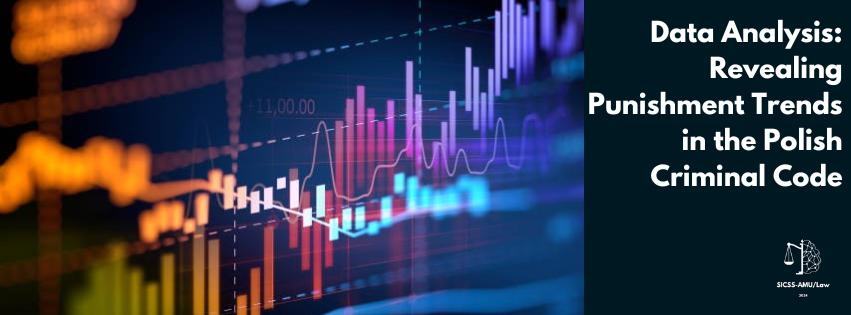
#### prepared by Jędrzej Wydra
[LinkedIn](https://www.linkedin.com/in/j%C4%99drzej-wydra-3b12b4232/), [Google Scholar](https://scholar.google.pl/citations?user=arKNI6UAAAAJ&hl=pl&oi=ao)



# Abstract

**Introduction**: The Polish Criminal Code groups crimes into thematic chapters, such as "crimes against life and health," "crimes against property," and "crimes against national defense." The Polish government does not provide an official English translation of the Criminal Code.

**Hypotheses**:
1. The chapters of the Polish Criminal Code vary in their average punitiveness.
2. The chapters of the Polish Criminal Code are ordered by the severity of penalties.

**Main Goals**:
1. *Data Preparation:* Participants identify potential issues with extracting data from the Polish Criminal Code, upload the Code into the Python environment, clean the data, and analyze its structure from a programming perspective.
2. *Data Translation:* Participants translate the Criminal Code into English using Google Translate within the Python environment.
3. *Data Analysis:* Participants use statistical methods to test the research hypotheses, checking for significant differences in average punitiveness across chapters and designing a statistical test to determine if the chapters are ordered by the severity of penalties.

**Methods**: Data extraction is performed using standard Python methods, such as loading PDF files and utilizing REGEX. Data cleaning is done using functionalities provided by ChatGPT. The first hypothesis is tested using standard statistical tests like ANOVA, the Kruskal-Wallis test and post hoc tests. The second hypothesis is tested through a procedure designed with participants.

**Outcomes**: Based on the results, participants determine whether to accept or reject the research hypotheses.

## The first disclaimer

This workshop is more about analysis and less about programming. So most necessary code is provided to you as functions in SICSS module.

Our goal today is to think, not to write a code.

In [ ]:
# Make sure you have uploaded the necessary files (cc.pdf and sicss_amu_2024.py) to the storage space (files tab).

In [ ]:
# Run this code to install necessary modules

!pip install PyPDF2
!pip install openai
!pip install deep_translator
!pip install scikit_posthocs

In [ ]:
# Run this code to import necessary modules

import sicss_amu_2024 as sicss
import numpy as np
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
from deep_translator import GoogleTranslator
from scipy.stats import shapiro, f_oneway, kruskal, tukey_hsd
from scipy.special import comb

## The second disclaimer

The SICSS module, which is provided for you, is useful only during this workshop. Its functions are not for general use; they are specifically tailored for the following exercises.

ChatGPT was indeed used for some tasks, but the respective function from the SICSS module just simulates the behavior of ChatGPT and returns exactly the same output as ChatGPT, without using it directly. The main reason for this is to expedite the workflow of this workshop, as the real use of ChatGPT would be unnecessarily time-consuming.

If you want to use ChatGPT in a similar way for your group project next week, please ask me for help and I will do my best.

## Exercises

**Exercise 1.**

Inspect the file 'cc.pdf' and identify potential problems with extracting data. Make a discussion about that.

HINT: You should find two the most obvious by looking at margins and footers.

**Exercise 2.**

Upload the file 'cc.pdf' to Python's local environment using our pre-defined function from our SICSS module.

In [ ]:
# Use the function upload_criminal_code(path) from our SICSS module.

criminal_code = sicss.upload_criminal_code('cc.pdf')

## HINT: to use a function from a given module, you should follow the pattern:
## module_name.function_name(arguments)
## which means that a name of a module should and a name of a function should be separate by a dot.

100%|██████████| 146/146 [00:09<00:00, 14.85it/s]


**Exercise 3.**

Examine the structure of the uploaded file, then save 'general_part' and 'special_part' in separate variables. Make a discussion about that.

In [ ]:
# Use the function type(). What does the output mean?

## HINT: a function is used before arguments, pattern:
## function_name(arguments)

## HINT2: you uploaded file should be stored in the variable criminal_code.

type(criminal_code)

dict

In [ ]:
# Use the method .keys() of a dict. What did you get?

## HINT: a method is used after its object, a dot separates object's name and method's name,
## at the end you always have brackets, pattern:
## object.method_name()

criminal_code.keys()

dict_keys(['general_part', 'special_part', 'military_part'])

In [ ]:
# Take a look at these values of above keys.

## HINT: to get access to a value of given key, you should put the key between quote signs
## and square brackets after object's name, pattern:
## object['key']

criminal_code['general_part']

'####Rozdział I Zasady odpowiedzialności karnej ###Art. 1. ##§ 1. Odpowiedzialności karnej podlega ten tylko, kto popełnia czyn zabroniony pod groźbą kary przez ustawę obowiązującą w czasie jego popełnienia. ##§ 2. Nie stanowi przestępstwa czyn zabroniony, którego społeczna szkodliwość jest znikoma. ##§ 3. Nie popełnia przestępstwa sprawca czynu zabronionego, jeżeli nie można mu przypisać winy w czasie czynu. ###Art. 2. ##Odpowiedzialności karnej za przestępstwo skutkowe popełnione przez zaniechanie podlega ten tylko, na kim ciążył prawny, szczególny obowiąz ek zapobiegnięcia skutkowi. ###Art. 3. ##Kary oraz inne środki przewidziane w tym kodeksie stosuje się z uwzględnieniem zasad humanitaryzmu, w szczególności z poszanowaniem godności człowieka. ###Art. 4. ##§ 1. Jeżeli w czasie orzekania obowiązuje ustawa inna niż w czasie popełnienia przestępstwa, stosuje się ustawę nową, jednakże należy stosować ustawę obowiązującą poprzednio, jeżeli jest względniejsza dla sprawcy. ##§ 2. Jeżeli w

In [ ]:
# @title Additional exercise, come back here after completing whole colab
# We use the method .split() of a string to change a string into list.
# In the string below there are special characters: #### next to Chapter, ### next to Article, ## next to paragraph.
# This special characters should help in spliting this string into list.
# Why they are sequences of '#'?
# Would it work in different order?
# E.g. ## next to Chapter, ### next to Article, #### next to paragraph.
# Could you use different characters than '#' to obtain the same result?
sicss.sicss_eng_hashtags['eng']

'####Chapter I Rules of criminal liability ###Art. 1. ##§ 1. Only those who commit an act prohibited under penalty by the law in force at the time of its commission are subject to criminal liability. ##§ 2. A prohibited act whose social harmfulness is negligible does not constitute a crime. ##§ 3. The perpetrator of a prohibited act does not commit a crime if no guilt can be attributed to him at the time of the act. ###Art. 2. ##Only those who had a legal, specific obligation to prevent the consequence are subject to criminal liability for a consequential crime committed by omission. ###Art. 3. ##Penalties and other measures provided for in this Code shall be applied taking into account the principles of humanitarianism, in particular respect for human dignity. ###Art. 4. ##§ 1. If, at the time of adjudication, a different law is in force than at the time of committing the crime, the new law shall apply, however, the previously applicable law shall apply if it is more favorable to the 

In [ ]:
# Use the function type() for value of each key. What does the output mean?

## HINT: the value of the key in a given object is another object.
## object['key'] is different object than just object.

type(criminal_code['general_part'])

str

In [ ]:
# Use the function len() for value of each key. What does the output mean?

## HINT: this is analogical to use of type() in exercise 3.

len(criminal_code['general_part'])

114320

In [ ]:
# Assign the value of general_part to variable 'general_part_string'.

general_part_string = criminal_code['general_part']

# Assign the value of special_part to variable 'special_part_string'.

special_part_string = criminal_code['special_part']

## HINT: remember that general_part and special_part are the keys of the criminal_code.

**Exercise 4.**

Examine a structure of the variables from previous exercise. Make a discussion about that.

In [ ]:
# Use the function type(). What does the output mean?

## HINT: you should do the same as in the previous exercise,
## but now with object general_part_string and special_part_string.

## HINT2: you should do it twice, after the first time delete the code and write another one.

type(general_part_string)

str

In [ ]:
# Use the function len(). What does the output mean?

## HINT: you should do the same as in the previous exercise,
## but now with different objects

## HINT2: you should do it twice, after the first time delete the code and write another one.

len(general_part_string)

114320

**Exercise 5.**

Convert strings from previous exercise to dictionary using our pre-defined function from our SICSS module. Discuss why dictrionary is better to strore Criminal Code.

In [ ]:
# Use the function convert_string_to_dict(string) from our SICSS module.
# What should be a key? What should be a value?

kk_general = sicss.convert_string_to_dict(general_part_string)
kk_special = sicss.convert_string_to_dict(special_part_string)

## HINT: this is analogical to the exercise 2.

**Exercise 6.**

Examine the structure of obtained variables. Get access to the article 147, which is in the chapter 'Rozdział XVIII Przestępstwa przeciwko obronności'. Look carefully if everything is ok. Identify a problem. Make a discussion about that.

HINT: in polish there is no such conotation as 'prz estępstwa', in polish there is a single word 'przestępstwa'.

In [ ]:
# Use the function type(). What does the output mean?

## HINT: you used type() in the previous exercises.

type(kk_special)

dict

In [ ]:
# Use the method .keys() of dict.

## HINT: you used .keys() in the previous exercises.

kk_special.keys()

dict_keys(['Rozdział XVI Przestępstwa przeciwko pokojowi, ludzkości oraz przestępstwa wojenne ', 'Rozdział XVII Przestępstwa przeciwko Rzeczypospolitej Polskiej ', 'Rozdział XVIII Przestępstwa przeciwko obronności ', 'Rozdział XIX Przestępstwa przeciwko życiu i zdrowiu ', 'Rozdział XX Przestępstwa przeciwko bezpieczeństwu powszechnemu ', 'Rozdział XXI Przestępstwa przeciwko bezpieczeństwu w komunikacji ', 'Rozdział XXII Przestępstwa przeciwko środowisku ', 'Rozdział XXIII Przestępstwa przeciwko wolności ', 'Rozdział XXIV Przestępstwa przeciwko wolności sumienia i wyznania ', 'Rozdział XXV Przestępstwa przeciwko wolności seksualnej i obyczajności ', 'Rozdział XXVI Przestępstwa przeciwko rodzinie i opiece ', 'Rozdział XXVII Przestępstwa przeciwko czci i nietykalności cielesnej ', 'Rozdział XXVIII Przestępstwa przeciwko prawom osób wykonujących pracę zarobkową ', 'Rozdział XXIX Przestępstwa przeciwko działalności instytucji państwowych oraz samorządu terytorialnego ', 'Rozdział XXX Przest

In [ ]:
# Get access to the value of key 'Rozdział XVIII Przestępstwa przeciwko obronności '
# Be carefull and notice that at the end of the key is white space.
# Can you get access to value without this whitespace?

kk_special['Rozdział XVIII Przestępstwa przeciwko obronności ']

{'Art. 140. ': ['§ 1. Kto, w celu osłabienia mocy obronnej Rzeczypospolitej Polskiej, dopuszcza się gwałtownego zamachu na jednostkę Sił Zbrojnych Rzeczypospolitej Polskiej, niszczy lub uszkadza obiekt albo urządzenie o znaczeniu obronnym, podlega karze pozbawienia wolności od roku do lat 10. ',
  '§ 2. Jeżeli następst wem czynu jest śmierć człowieka lub ciężki uszczerbek na zdrowiu wielu osób, sprawca podlega karze pozbawienia wolności od lat 2 do 15. ',
  '§ 3. Kto czyni przygotowania do przestępstwa określonego w § 1, podlega karze pozbawienia wolności do lat 3. ',
  '§ 4. W sprawie o przestępstwo określone w § 1–3 sąd może orzec przepadek przedmiotów również wtedy, gdy przedmioty nie stanowią własności sprawcy. '],
 'Art. 141. ': ['§ 1. Kto, będąc obywatelem polskim, przyjmuje bez zgody właściwego organu obowiązki wojskowe w obcym wojsku lu b w obcej organizacji wojskowej, podlega karze pozbawienia wolności od 3 miesięcy do lat 5. ',
  '§ 2. Kto przyjmuje obowiązki w zakazanej prze

In [ ]:
# Use the function type() on the object you displayed in the previous cell.
# What does the output mean?

type(kk_special['Rozdział XVIII Przestępstwa przeciwko obronności '])

dict

In [ ]:
# Use the method .keys() of dict in the same object as in the previous cell.

kk_special['Rozdział XVIII Przestępstwa przeciwko obronności '].keys()

dict_keys(['Art. 140. ', 'Art. 141. ', 'Art. 142. ', 'Art. 143. ', 'Art. 144. ', 'Art. 145. ', 'Art. 146. ', 'Art. 147. '])

In [ ]:
# Get access to the value of the key 'Art. 147. '
# of the value of the key 'Rozdział XVIII Przestępstwa przeciwko obronności '.
# Be carefull.


## HINT: dictionary['key1']['key2']
## If the above does not work it might mean that you put keys in incorrect order.

kk_special['Rozdział XVIII Przestępstwa przeciwko obronności ']['Art. 147. ']

['W stosunku do sprawcy prz estępstwa określonego w art. 143 § 1 lub w art. 144 lub 145, który w chwili czynu był niezdolny do pełnienia służby wojskowej, sąd może zastosować nadzwyczajne złagodzenie kary, a nawet odstąpić od jej wymierzenia. ']

In [ ]:
# Run this cell.
# How does the above output differ from below one?

kk_special['Rozdział XVIII Przestępstwa przeciwko obronności ']['Art. 147. '][0]

# HINT: you can use function type() in another cell.

'W stosunku do sprawcy prz estępstwa określonego w art. 143 § 1 lub w art. 144 lub 145, który w chwili czynu był niezdolny do pełnienia służby wojskowej, sąd może zastosować nadzwyczajne złagodzenie kary, a nawet odstąpić od jej wymierzenia. '

**Exercise 7.**

Use our pre-defined function from our SICSS module to correct data with a help of ChatGPT.

In [ ]:
# Use the function correction_by_gpt(data_dict) from our SICSS module.

kk_corrected = sicss.correction_by_gpt(kk_special)

## HINT: this is analogical to the exercise 2.

100%|██████████| 22/22 [00:44<00:00,  2.00s/it]


**Exercise 8.**

Translate data from polish to english and answer the questions in comments.

In [ ]:
# Why do we need three 'for' loops?

# Why do we need to initialize a new empty dictionary?
cc_special = {}
keys = kk_corrected.keys()
for i in tqdm(keys):
  keys2 = kk_corrected[i].keys()

  # Why do we need to translate text and chapters separetly?
  ii = GoogleTranslator(source='polish', target='english').translate(i) # replace '_________' with your code to translate chapters' titles

  # Why do we need to initialize a new empty dictionary again?
  # Do we do this once?
  cc_special[ii] = {}
  for j in keys2:
    cc_special[ii][j] = []
    for k in range(len(kk_corrected[i][j])):
      list_element = GoogleTranslator(source='polish', target='english').translate(kk_corrected[i][j][k]) # replace '_________' with your code to translate text of criminal code
      cc_special[ii][j].append(list_element)

## HINT: the keys are stored in variable i in every run of a loop.
## HINT2: the text or criminal code is stored in kk_corrected[i][j][k]. Explain why.

100%|██████████| 22/22 [10:59<00:00, 29.98s/it]


In [ ]:
# Examine 'Chapter XXI Crimes against communication security'

# Why do we need two 'for' loops?

# Why do we iterate over keys here?
for i in cc_special['Chapter XXI Crimes against communication security'].keys():

  # And here over range?
  for j in range(len(cc_special['Chapter XXI Crimes against communication security'][i])):

    # Why do we print variable i here?
    print(i)
    print(cc_special['Chapter XXI Crimes against communication security'][i][j])

## HINT: just run this cell and analyze the output.

Art. 173. 
§ 1. Whoever causes a disaster in land, water or air traffic that threatens the life or health of many people or large-scale property, shall be subject to the penalty of imprisonment from one to 10 years.
Art. 173. 
§ 2. If the perpetrator acts unintentionally, he or she shall be subject to the penalty of imprisonment from 3 months to 5 years.
Art. 173. 
§ 3. If the act specified in § 1 results in the death of a person or serious damage to the health of many people, the perpetrator shall be subject to the penalty of imprisonment from 2 to 15 years.
Art. 173. 
§ 4. If the act specified in § 2 results in the death of a person or serious damage to the health of many people, the perpetrator shall be subject to the penalty of imprisonment from 6 months to 8 years.
Art. 174. 
§ 1. Whoever causes an immediate danger of a disaster in land, water or air traffic shall be subject to the penalty of imprisonment from 6 months to 8 years.
Art. 174. 
§ 2. If the perpetrator acts unintentio

**Exercise 9.**

Run the code below and read the results. Next, examine the special part of polish criminal code (english version) and try to find a patterns how it describes limits of deprivation of liberty. You should find at least 12 patterns.

HINT:

One of the patterns is 'not less than {digits} years'.

Another pattern is 'from {digits} months to {digits} years'.

In [ ]:
text = sicss.convert_string_to_dict(general_part_string, split_bullets = True)['Rozdział IV Kary ']['Art. 32. '][0]
text2 = sicss.convert_string_to_dict(general_part_string, split_bullets = True)['Rozdział IV Kary ']['Art. 37. '][0]
text2 = re.sub(pattern = '; ', repl = ';\n', string = text2)
print('Art. 32.')
print(GoogleTranslator(source='polish', target='english').translate(text))
print('\nArt. 37.')
print(GoogleTranslator(source='polish', target='english').translate(text2))

Art. 32.
The penalties are:
1) fine;
2) restriction of freedom;
3) deprivation of liberty;
4) (repealed)
5) life imprisonment.

Art. 37.
The penalty of imprisonment specified in Art. 32 point 3 lasts the shortest one month and the longest 30 years;
it is measured in months and years.


In [ ]:
number_of_chapter = 16 # Asign the number of a chapter (integer from 16 to 37) and run the cell to display it.

chapters = list(cc_special.keys())
for i in cc_special[chapters[number_of_chapter - 16]].keys():
  for j in range(len(cc_special[chapters[number_of_chapter - 16]][i])):
    print(i)
    print(cc_special[chapters[number_of_chapter - 16]][i][j])

Art. 117. 
§ 1. Whoever initiates or wages a war of aggression shall be subject to the penalty of deprivation of liberty for a minimum term of 12 years or the penalty of deprivation of liberty for life.
Art. 117. 
Remove unnecessary spaces from § 2. (repealed)
Art. 117. 
§ 3. Whoever publicly calls for the initiation of a war of aggression or publicly approves the initiation or conduct of such a war shall be subject to the penalty of imprisonment from 3 months to 5 years.
Art. 118. 
§ 1. Whoever, in order to destroy, in whole or in part, a national, ethnic, racial, political, religious group or a group with a specific worldview, commits murder or causes serious damage to the health of a person belonging to such a group, shall be subject to the penalty of deprivation of liberty for a period of time. not less than 12 years or life imprisonment.
Art. 118. 
§ 2. Whoever, for the purposes specified in § 1, creates living conditions for persons belonging to such a group that threaten their b

In [ ]:
patterns = ['from {digits} months to {digits} years',
'for years {digits} to {digits}',
'from {digits} to {digits} years',
'of {digits} to {digits} years',
'for up to {digits} months. months to {digits} years',
'up to {digits} years',
'from one to {digits} years',
'between {digits} and {digits} years',
'between {digits} months and {digits} years',
'between one and {digits} years',
'not less than {digits} years',]

for i in range(len(patterns)):
  print(patterns[i])
  print('\n')

from {digits} months to {digits} years


for years {digits} to {digits}


from {digits} to {digits} years


of {digits} to {digits} years


for up to {digits} months. months to {digits} years


up to {digits} years


from one to {digits} years


between {digits} and {digits} years


between {digits} months and {digits} years


between one and {digits} years


not less than {digits} years




**Exercise 10.**

We are interested just in upper limits. Compare the patterns from previous exercise and explain why the below algorithm uses just four and it is enough. Make a discussion about that.

In [ ]:
# Assign examples to variable 'paragraph' and run the code to see result.

paragraph = '§ 3. Whoever publicly calls for the initiation of a war of aggression or publicly approves the initiation or conduct of such a war shall be subject to the penalty of imprisonment from 3 months to 5 years.'

# The first pattern.
if re.findall('to \d+ ', paragraph) != []:
  penalty = re.findall('\d+', re.findall('to \d+ ', paragraph)[-1])[-1] # this line extract number from paragraph, the pattern you are looking for is in previous line
# The second pattern.
elif re.findall('and \d+ ', paragraph) != []:
  penalty = re.findall('\d+', re.findall('and \d+ ', paragraph)[-1])[-1] # this line extract number from paragraph, the pattern you are looking for is in previous line
# The third pattern.
elif re.findall('not less than \d+ ', paragraph) != []:
# Why is the value here 30? HINT: look again at previous exercise
  penalty = 30
else:
  penalty = np.nan

# The fourh pattern.
if re.findall('up to one year', paragraph) != []:
  penalty = 1


print(penalty)

## HINT: the patterns are the first argument of the function findall() from the module re

5


**Exercise 11.**

Use our pre-defined function from our SICSS module to change dictionary of criminal code to Pandas' data frame.

In [ ]:
# Convert cc_special to pandas' DataFrame using the function dict2DataFrame(dict) from our SICSS module.

cc_df = sicss.dict2DataFrame(cc_special)

## HINT: this is analogical to the exercise 2.

100%|██████████| 22/22 [00:01<00:00, 19.89it/s]


**Exercise 12.**

Ask ChatGPT about assumptions of ANOVA test and how you can check them in Python. (To do so use a functions from scipy module). Ask ChatGPT what to do when assumptions are not met. Make a discussion about that.

**Exercise 13.**

Fulfill below code with proper function to check if data are normally distributed. Why do we need a loop? Are data normally dustributted?

In [ ]:
# Replace '____' with proper function.
# What does the output mean?

for i in cc_df['chapter'].unique():
  print(shapiro(cc_df[cc_df['chapter'] == i]['penalty'].dropna()).pvalue)

## HINT: you should use the Shapiro-Wilk's test here.
## HINT2: are the p values below 0.05?

0.027455879375338554
0.00039109535282477736
0.011587492190301418
1.8246011677547358e-05
0.022254066541790962
0.0054634977132081985
0.024093644693493843
0.01399766094982624
1.0
0.0006942665786482394
0.036846742033958435
1.0
0.16700315475463867
0.001961898058652878
0.0007022767676971853
0.02881479635834694
0.0003469569783192128
0.11494914442300797
9.02479951037094e-05
0.0002265824150526896
4.987105626241828e-07
0.0014723255299031734


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


**Exercise 14.**

Run codes below. Which one is correct and why the results are different? Make a discussion about that.

In [ ]:
groups = cc_df['chapter'].unique()

# ANOVA test
results_anova = f_oneway(
    cc_df[cc_df['chapter'] == groups[0]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[1]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[2]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[3]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[4]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[5]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[6]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[7]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[8]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[9]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[10]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[11]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[12]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[13]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[14]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[15]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[16]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[17]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[18]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[19]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[20]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[21]]['penalty'].dropna()
)

# Kruskal-Wallis test
results_kruskal = kruskal(
    cc_df[cc_df['chapter'] == groups[0]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[1]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[2]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[3]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[4]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[5]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[6]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[7]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[8]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[9]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[10]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[11]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[12]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[13]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[14]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[15]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[16]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[17]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[18]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[19]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[20]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[21]]['penalty'].dropna()
)

## HINT: were the assumptions met?

In [ ]:
# Results of ANOVA test
# How to read the output?
# What does the output mean?

print(results_anova)

F_onewayResult(statistic=4.493953503583276, pvalue=7.397148488705208e-10)


In [ ]:
# Results of Kruskal-Wallis test
# How to read the output?
# What does the output mean?

print(results_kruskal)

KruskalResult(statistic=71.03005514823246, pvalue=2.4003255597420945e-07)


**Exercise 15.**

Perform post hoc test using codes below. Compare the results and explain which one is correct. Make a discussion about that.

In [ ]:
# HSD Tukey's test
results_tukey_hsd = tukey_hsd(
    cc_df[cc_df['chapter'] == groups[0]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[1]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[2]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[3]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[4]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[5]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[6]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[7]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[8]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[9]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[10]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[11]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[12]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[13]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[14]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[15]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[16]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[17]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[18]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[19]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[20]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[21]]['penalty'].dropna()
)

# Dunn's test
results_dunn = sp.posthoc_dunn(
    [cc_df[cc_df['chapter'] == groups[0]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[1]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[2]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[3]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[4]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[5]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[6]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[7]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[8]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[9]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[10]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[11]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[12]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[13]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[14]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[15]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[16]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[17]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[18]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[19]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[20]]['penalty'].dropna(),
    cc_df[cc_df['chapter'] == groups[21]]['penalty'].dropna()]
)

## HINT: are the specific post hoc tests paired to ANOVA or Kruskal-Wallis test?

In [ ]:
# Results of ANOVA test
# How to read the output?
# What does the output mean?

print(results_tukey_hsd)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      1.194     1.000    -6.327     8.716
 (0 - 2)     11.373     0.001     2.777    19.969
 (0 - 3)      7.327     0.030     0.296    14.358
 (0 - 4)      6.844     0.184    -0.992    14.681
 (0 - 5)      9.578     0.009     1.145    18.011
 (0 - 6)      9.333     0.006     1.293    17.374
 (0 - 7)      7.978     0.091    -0.455    16.411
 (0 - 8)     14.444     0.078    -0.598    29.487
 (0 - 9)      6.618     0.187    -0.972    14.209
 (0 - 10)     10.194     0.009     1.205    19.184
 (0 - 11)     15.444     0.036     0.402    30.487
 (0 - 12)     14.444     0.001     3.074    25.815
 (0 - 13)      9.122     0.001     1.974    16.270
 (0 - 14)     11.792     0.000     4.201    19.383
 (0 - 15)     12.778     0.010     1.407    24.149
 (0 - 16)      9.204     0.002     1.748    16.661
 (0 - 17)     12.291     0.000     3.511    21.070
 (0 - 18)      9.556    

In [ ]:
# Results of Kruskal-Wallis test
# How to read the output?
# What does the output mean?

print(results_dunn)

          1         2         3         4         5         6         7   \
1   1.000000  0.456560  0.000374  0.016231  0.158648  0.012093  0.011873   
2   0.456560  1.000000  0.002074  0.078867  0.455724  0.049983  0.051765   
3   0.000374  0.002074  1.000000  0.074119  0.020134  0.293378  0.228494   
4   0.016231  0.078867  0.074119  1.000000  0.389160  0.568754  0.635954   
5   0.158648  0.455724  0.020134  0.389160  1.000000  0.219585  0.241349   
6   0.012093  0.049983  0.293378  0.568754  0.219585  1.000000  0.911938   
7   0.011873  0.051765  0.228494  0.635954  0.241349  0.911938  1.000000   
8   0.026633  0.099072  0.184852  0.810385  0.353305  0.779405  0.855619   
9   0.000407  0.001276  0.140795  0.012511  0.004782  0.035820  0.028471   
10  0.059239  0.215386  0.046739  0.691862  0.657234  0.392736  0.436289   
11  0.004019  0.017516  0.618899  0.268644  0.092610  0.615009  0.531044   
12  0.000042  0.000150  0.043260  0.002093  0.000712  0.008036  0.005956   
13  0.000005

**Exercise 16.**

Perform analysis to check the hypothesis that the chapters in polish criminal code are ordered by severity in terms of fine. You can use the code below as template.

HINT: You should collaborate and discuss during this exercise.

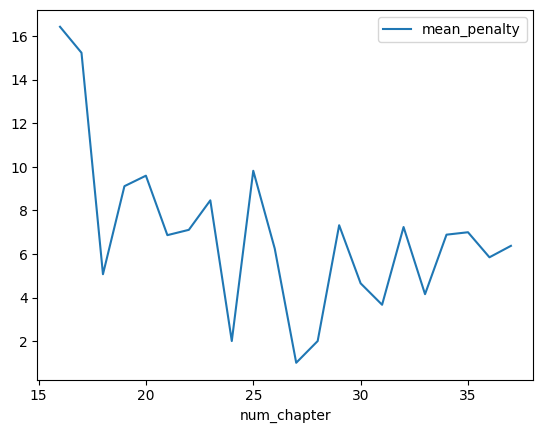

In [ ]:
# Plot presenting data mean penalty vs. number of chapter
cc_df.groupby('num_chapter').agg(mean_penalty = ('penalty', 'mean')).plot()
plt.show()

# How to read the plot?

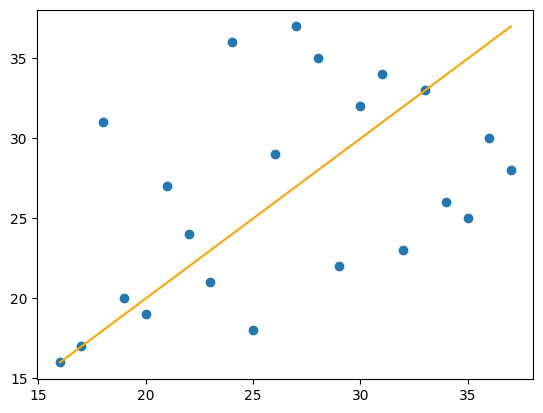

In [ ]:
# Plot presenting data actual number of chapter vs. expected number of chapter
ar_df = cc_df.groupby('num_chapter').agg(mean_penalty = ('penalty', 'mean')).sort_values('mean_penalty',
                                                                                         ascending = False)
ar_df['index'] = np.arange(0, len(ar_df)) + 16
ploting_data = ar_df.reset_index().sort_values('num_chapter')
plt.scatter(ploting_data['num_chapter'], ploting_data['index'])
plt.plot(ploting_data['num_chapter'], ploting_data['num_chapter'], color = 'orange')
plt.show()

# What does it mean that point lays on the line?

In [ ]:
# Obtain p_value
test_statistic = 3
sicss.p_value_of_testing_order(test_statistic, 22)

# What does the output mean?

0.0004277229309082031

In [ ]:
# Warm-up questions!
# Let us assume that you have column that indicates gender, 1 means female, 0 means male.
# Can you calculate a mean of this columns? If so, what it would mean?
# How it is connected to to fine column in our dataset?

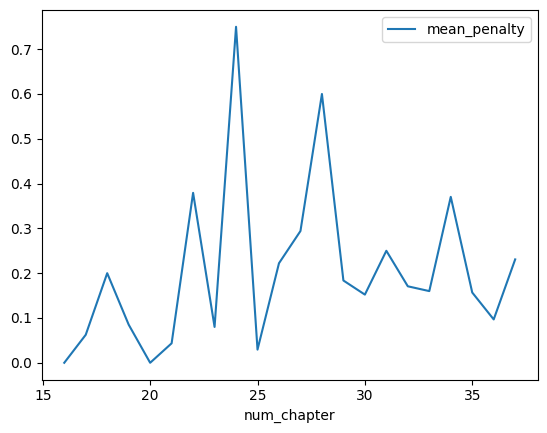

In [ ]:
# Enter your code here
cc_df.groupby('num_chapter').agg(mean_penalty = ('fine', 'mean')).plot()
plt.show()

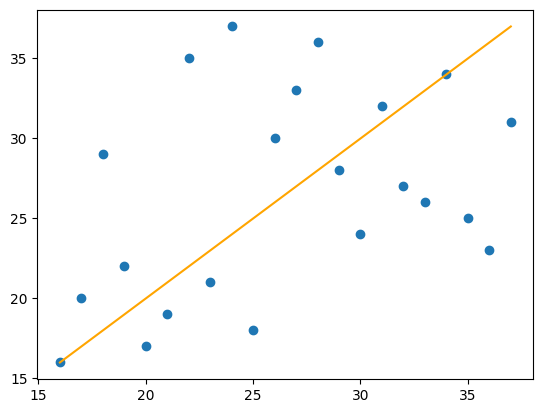

In [ ]:
# Plot presenting data actual number of chapter vs. expected number of chapter
ar_df = cc_df.groupby('num_chapter').agg(mean_fine = ('fine', 'mean')).sort_values('mean_fine',
                                                                                         ascending = True)
ar_df['index'] = np.arange(0, len(ar_df)) + 16
ploting_data = ar_df.reset_index().sort_values('num_chapter')
plt.scatter(ploting_data['num_chapter'], ploting_data['index'])
plt.plot(ploting_data['num_chapter'], ploting_data['num_chapter'], color = 'orange')
plt.show()

In [ ]:
test_statistic = 2
sicss.p_value_of_testing_order(test_statistic, 22)

6.0558319091796875e-05